In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import imread
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import SGD
import tensorflow as tf

In [31]:
train=pd.read_csv("C:\\Users\\Anamika Shekhar\\MNIST\\train.csv")
test=pd.read_csv("C:\\Users\\Anamika Shekhar\\MNIST\\test.csv")

In [32]:
test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
Y_train_df=train['label']


In [34]:
X_train_df=train.iloc[:,1:]
X_test_df=test

(array([4132., 4684., 4177., 4351., 4072., 3795., 4137., 4401., 4063.,
        4188.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

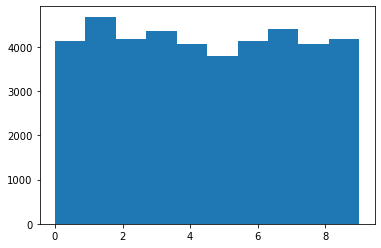

In [35]:
#To get the idea if the images are evenly distributed
plt.hist(Y_train_df)

In [36]:
#To figure of if we have a lot of null values.
X_train_df.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [37]:
X_test_df.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [9]:
X_train_df.loc[1]

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Name: 1, Length: 784, dtype: int64

In [38]:
## Conver the dataframe to an array
X_train_ar = X_train_df.values.reshape(-1,28,28,1)
X_test_ar = X_test_df.values.reshape(-1,28,28,1)

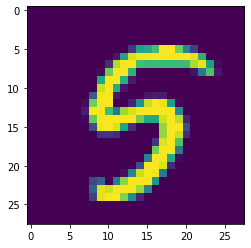

In [39]:
##View the picture
plt.imshow(X_train_ar[8])
plt.show()

In [40]:
##Grey Scale Normalization 
X_train = X_train_ar/255.0
X_test = X_test_ar/255.0

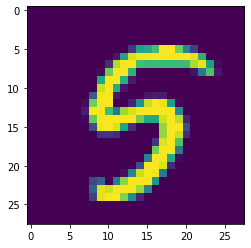

In [13]:
plt.imshow(X_train[8])
plt.show()

In [41]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le_X = LabelEncoder()
Y_train = le_X.fit_transform(Y_train_df)
Y_train = pd.get_dummies(Y_train, prefix='Number')
Y_train

,Number_0,Number_1,Number_2,Number_3,Number_4,Number_5,Number_6,Number_7,Number_8,Number_9
0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
41995,1,0,0,0,0,0,0,0,0,0
41996,0,1,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,1,0,0
41998,0,0,0,0,0,0,1,0,0,0


In [42]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state = 0)

In [43]:
print ("Training Examples = " + str(X_train.shape[0]))
print ("Validation Examples = " + str(X_val.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_val shape: " + str(X_val.shape))
print ("Y_val shape: " + str(Y_val.shape))
print ("X_test shape: " + str(X_test.shape))

Training Examples = 37800
Validation Examples = 4200
X_train shape: (37800, 28, 28, 1)
Y_train shape: (37800, 10)
X_val shape: (4200, 28, 28, 1)
Y_val shape: (4200, 10)
X_test shape: (28000, 28, 28, 1)


In [44]:
model = tf.keras.Sequential([
            ## ZeroPadding2D with padding 3, input shape of 64 x 64 x 3
            tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)),
            tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(26, 26, 1)),

            ## Conv2D with 32 7x7 filters and stride of 1
            tf.keras.layers.MaxPooling2D((2, 2)),
            ## BatchNormalization for axis 3
            tf.keras.layers.Flatten(),
            ## ReLU
            tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_uniform'),
            ## Max Pooling 2D with default parameters
            tf.keras.layers.Dense(10, activation='softmax')
            ## Flatten layer
           
        
        ])

In [45]:
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=optimizer,loss='categorical_crossentropy', metrics=['accuracy'])

In [46]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).batch(64)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, Y_val)).batch(64)
history = model.fit(train_dataset, epochs=30, validation_data=val_dataset)

Epoch 1/30
591/591 [==============================] - 72s 120ms/step - loss: 0.1855 - accuracy: 0.9435 - val_loss: 0.0922 - val_accuracy: 0.9705
Epoch 2/30
591/591 [==============================] - 72s 122ms/step - loss: 0.0566 - accuracy: 0.9829 - val_loss: 0.0647 - val_accuracy: 0.9786
Epoch 3/30
591/591 [==============================] - 73s 124ms/step - loss: 0.0355 - accuracy: 0.9897 - val_loss: 0.0507 - val_accuracy: 0.9840
Epoch 4/30
591/591 [==============================] - 71s 120ms/step - loss: 0.0230 - accuracy: 0.9929 - val_loss: 0.0507 - val_accuracy: 0.9845
Epoch 5/30
591/591 [==============================] - 71s 119ms/step - loss: 0.0140 - accuracy: 0.9964 - val_loss: 0.0561 - val_accuracy: 0.9829
Epoch 6/30
591/591 [==============================] - 67s 113ms/step - loss: 0.0090 - accuracy: 0.9979 - val_loss: 0.0636 - val_accuracy: 0.9836
Epoch 7/30
591/591 [==============================] - 48s 81ms/step - loss: 0.0065 - accuracy: 0.9985 - val_loss: 0.0615 - val_acc

C:\Anamika\Python\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

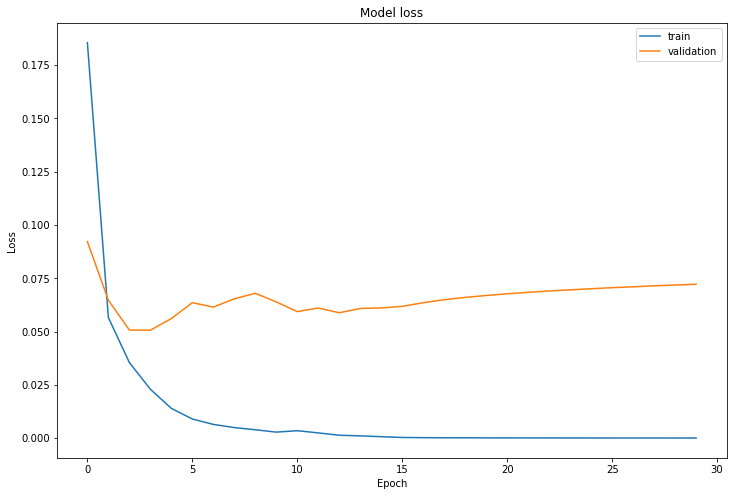

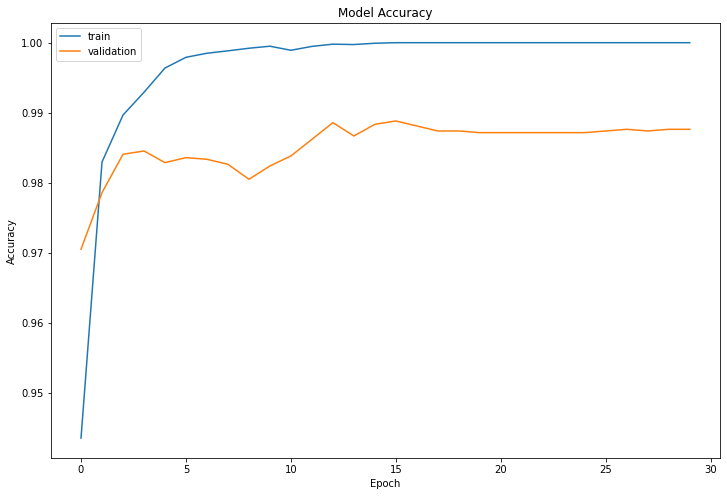

In [47]:
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')

In [48]:
results = model.predict(X_test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

In [49]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("CNN_output.csv",index=False)